下面的代码改写自 [COCO 官方 API](https://github.com/cocodataset/cocoapi)，改写后的代码 [cocoz.py](https://github.com/Xinering/cocoapi/blob/master/PythonAPI/pycocotools/cocoz.py) 被我放置在 [Xinering/cocoapi](https://github.com/Xinering/cocoapi)。我的主要改进有：

1. 增加对 Windows 系统的支持；
2. 替换 `defaultdict` 为 `dict.get()`，解决 Windows 的编码问题。
3 跳过解压这一步骤（包括直接的或间接的解压），直接对图片数据 `images` 与标注数据 `annotations` 操作。
4 因为，无需解压，所以 API 的使用更加便捷和高效。

具体的 API 使用说明见如下内容：

## 0  准备

[COCOZ 简介](https://codexzone.github.io/cocox/)

为了可以使用 `cocoz`，你需要下载  [Xinering/cocoapi](https://github.com/Xinering/cocoapi)。之后将其放在你需要运行的项目或程序根目录，亦或者使用如下命令添加环境变量（暂时的）：

In [1]:
import sys
sys.path.append('D:\API\cocoapi\PythonAPI')  # 你下载的 cocoapi 所在路径

from pycocotools.cocoz import AnnZ, ImageZ, COCOZ   # 载入 cocoz

下面我们就可以利用这个 API 的 `cocoz.AnnZ`、`cocoz.ImageZ` 和 `cocoz.COCOZ` 类来操作 COCO 图片和标注了。下面我以 Windows 系统为例说明，Linux 是类似的。

## 1  cocoz.AnnZ 与 cocoz.ImageZ

In [2]:
root = r'E:\Data\coco'   # COCO 数据集所在根目录
annType = 'annotations_trainval2017'   # COCO 标注数据类型

annZ = AnnZ(root, annType)

我们来查看一下，该标注数据所包含的标注类型：

In [3]:
annZ.names

['annotations/instances_train2017.json',
 'annotations/instances_val2017.json',
 'annotations/captions_train2017.json',
 'annotations/captions_val2017.json',
 'annotations/person_keypoints_train2017.json',
 'annotations/person_keypoints_val2017.json']

以 `dict` 的形式载入 `'annotations/instances_train2017.json'` 的具体信息：

In [4]:
annFile = 'annotations/instances_val2017.json'
dataset = annZ.json2dict(annFile)

Loading json in memory ...
used time: 0.890035 s


In [5]:
dataset.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [6]:
dataset['images'][0]  # 记录了一张图片的一些标注信息

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

### 1.1  从网页获取图片

Populating the interactive namespace from numpy and matplotlib


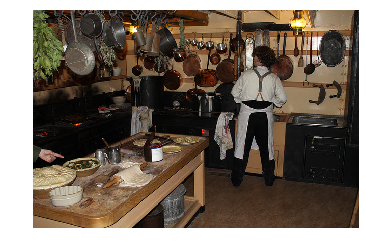

In [7]:
%pylab inline
import skimage.io as sio

coco_url = dataset['images'][0]['coco_url']
# use url to load image
I = sio.imread(coco_url)
plt.axis('off')
plt.imshow(I)
plt.show()

### 1.2  从本地读取图片

为了避免解压数据集，我使用了 `zipfile` 模块：

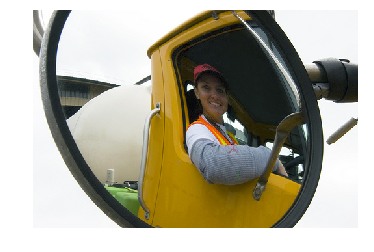

In [8]:
imgType = 'val2017'
imgZ = ImageZ(root, imgType)

I = imgZ.buffer2array(imgZ.names[0])

plt.axis('off')
plt.imshow(I)
plt.show()

## 2  cocoz.COCOZ

In [9]:
root = r'E:\Data\coco'   # COCO 数据集所在根目录
annType = 'annotations_trainval2017'   # COCO 标注数据类型
annFile = 'annotations/instances_val2017.json'

annZ = AnnZ(root, annType)
coco = COCOZ(annZ, annFile)

Loading json in memory ...
used time: 1.02004 s
Loading json in memory ...
creating index...
index created!
used time: 0.431003 s


如果你需要预览你载入的 COCO 数据集，可以使用 `print()` 来实现：

In [10]:
print(coco)

description: COCO 2017 Dataset
url: http://cocodataset.org
version: 1.0
year: 2017
contributor: COCO Consortium
date_created: 2017/09/01


In [11]:
coco.keys()

dict_keys(['dataset', 'anns', 'imgToAnns', 'catToImgs', 'imgs', 'cats'])

### 2.1  展示 COCO 的类别与超类

In [12]:
cats = coco.loadCats(coco.getCatIds())
nms = set([cat['name'] for cat in cats])  # 获取 cat 的 name 信息
print('COCO categories: \n{}\n'.format(' '.join(nms)))
# ============================================================
snms = set([cat['supercategory'] for cat in cats])  # 获取 cat 的 name 信息
print('COCO supercategories: \n{}'.format(' '.join(snms)))

COCO categories: 
kite potted plant handbag clock umbrella sports ball bird frisbee toilet toaster spoon car snowboard banana fire hydrant skis chair tv skateboard wine glass tie cell phone cake zebra baseball glove stop sign airplane bed surfboard cup knife apple broccoli bicycle train carrot remote cat bear teddy bear person bench horse dog couch orange hair drier backpack giraffe sandwich book donut sink oven refrigerator boat mouse laptop toothbrush keyboard truck motorcycle bottle pizza traffic light cow microwave scissors bus baseball bat elephant fork bowl tennis racket suitcase vase sheep parking meter dining table hot dog

COCO supercategories: 
accessory furniture sports vehicle appliance electronic animal indoor outdoor person kitchen food


### 2.2  通过给定条件获取图片

获取包含给定类别的所有图片

In [13]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['cat', 'dog', 'snowboar'])  # 获取 Cat 的 Ids
imgIds = coco.getImgIds(catIds=catIds )  # 
img = coco.loadImgs(imgIds)

随机选择一张图片的信息：

In [14]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

img

{'license': 4,
 'file_name': '000000318238.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000318238.jpg',
 'height': 640,
 'width': 478,
 'date_captured': '2013-11-21 00:01:06',
 'flickr_url': 'http://farm8.staticflickr.com/7402/9964003514_84ce7550c9_z.jpg',
 'id': 318238}

### 2.2.1  获取图片

从网络获取图片：

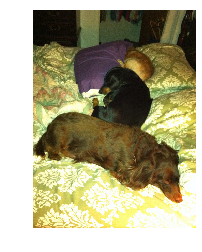

In [17]:
coco_url = img['coco_url']

I = sio.imread(coco_url)
plt.axis('off')
plt.imshow(I)
plt.show()

从本地获取图片：

**这里有一个梗：`cv2` 的图片默认模式是 BGR 而不是 RGB,所以，将 `I` 直接使用 `plt` 会改变原图的颜色空间，为此我们可以使用 `cv2.COLOR_BGR2RGB`.**

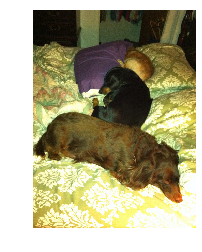

In [18]:
imgType = 'val2017'
imgZ = ImageZ(root, imgType)

I = imgZ.buffer2array(img['file_name'])

plt.axis('off')
plt.imshow(I)
plt.show()

### 2.3  将图片的 anns 信息标注在图片上

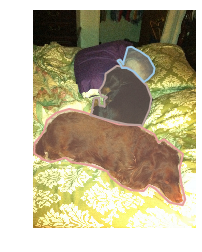

In [20]:
# load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

### 2.4  关键点检测

In [22]:
# initialize COCO api for person keypoints annotations
root = r'E:\Data\coco'   # COCO 数据集所在根目录
annType = 'annotations_trainval2017'   # COCO 标注数据类型
annFile = 'annotations/person_keypoints_val2017.json'

annZ = AnnZ(root, annType)
coco_kps = COCOZ(annZ, annFile)

Loading json in memory ...
used time: 0.882997 s
Loading json in memory ...
creating index...
index created!
used time: 0.368036 s


先选择一张带有 `person` 的图片：

In [25]:
catIds = coco.getCatIds(catNms=['person'])  # 获取 Cat 的 Ids
imgIds = coco.getImgIds(catIds=catIds)  
img = coco.loadImgs(imgIds)[77]

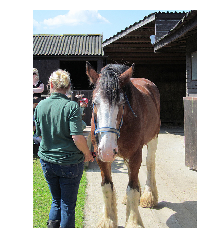

In [26]:
# use url to load image
I = sio.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

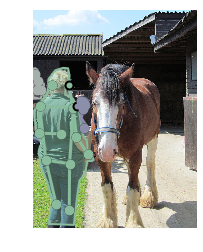

In [27]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

### 2.5  看图说话

In [28]:
# initialize COCO api for person keypoints annotations
root = r'E:\Data\coco'   # COCO 数据集所在根目录
annType = 'annotations_trainval2017'   # COCO 标注数据类型
annFile = 'annotations/captions_val2017.json'

annZ = AnnZ(root, annType)
coco_caps = COCOZ(annZ, annFile)

Loading json in memory ...
used time: 0.435748 s
Loading json in memory ...
creating index...
index created!
used time: 0.0139964 s


A brown horse standing next to a woman in front of a house.
a person standing next to a horse next to a building
A woman stands beside a large brown horse.
The woman stands next to the large brown horse.
A woman hold a brown horse while a woman watches.


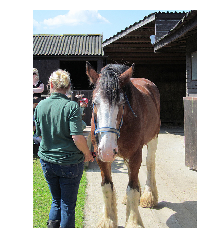

In [29]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I)
plt.axis('off')
plt.show()

如果你需要使用官方 API, 可以参考 [COCO 数据集的使用](https://www.cnblogs.com/q735613050/p/8969452.html)。

如果你觉得对你有帮助，请帮忙在 Github 上点个 **star**：[datasetsome](https://github.com/DataLoaderX/datasetsome)。该教程的代码我放在了 GitHub: [COCOZ 使用说明书](https://github.com/DataLoaderX/datasetsome/blob/InProgress/COCO/COCOZ%20使用说明书.ipynb)。